# Motivation

> **_Look at a stone cutter hammering away at his rock,          
perhaps a hundred times without as much as a crack showing in it._**         
>             
> **_Yet at the hundred-and-first blow it will split in two,     
and I know it was not the last blow that did it,        
but all that had gone before._**      

# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
from xgboost import XGBClassifier
import catboost as cb
import lightgbm as lgb
from collections import defaultdict
import plotly.express as px

# SEED Everything: for reproducibility

In [4]:
SEED = 42

def seed_everything(seed = 42):
    import random, os
    import numpy as np
    
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
seed_everything(SEED)

# reading the data 

In [5]:
data = pd.read_csv('../input/kagglex-bipoc-2022-2023-ml-foundation/Train.csv')
test_df = pd.read_csv('../input/kagglex-bipoc-2022-2023-ml-foundation/Test.csv')
sample_sub = pd.read_csv('../input/kagglex-bipoc-2022-2023-ml-foundation/Sample_submission.csv')

In [6]:
data.dtypes

ID          object
AAGE         int64
ACLSWKR     object
ADTIND       int64
ADTOCC       int64
AHGA        object
AHRSPAY      int64
AHSCOL      object
AMARITL     object
AMJIND      object
AMJOCC      object
ARACE       object
AREORGN     object
ASEX        object
AUNMEM      object
AUNTYPE     object
AWKSTAT     object
CAPGAIN      int64
CAPLOSS      int64
DIVVAL       int64
FILESTAT    object
GRINREG     object
GRINST      object
HHDFMX      object
HHDREL      object
MIGMTR1     object
MIGMTR3     object
MIGMTR4     object
MIGSAME     object
MIGSUN      object
NOEMP        int64
PARENT      object
PEFNTVTY    object
PEMNTVTY    object
PENATVTY    object
PRCITSHP    object
SEOTR        int64
VETQVA      object
VETYN        int64
WKSWORK      int64
YEAR         int64
TARGET       int64
dtype: object

In [7]:
data.isnull().sum()

ID              0
AAGE            0
ACLSWKR         0
ADTIND          0
ADTOCC          0
AHGA            0
AHRSPAY         0
AHSCOL          0
AMARITL         0
AMJIND          0
AMJOCC          0
ARACE           0
AREORGN         0
ASEX            0
AUNMEM          0
AUNTYPE         0
AWKSTAT         0
CAPGAIN         0
CAPLOSS         0
DIVVAL          0
FILESTAT        0
GRINREG         0
GRINST        700
HHDFMX          0
HHDREL          0
MIGMTR1     77320
MIGMTR3     77320
MIGMTR4     77320
MIGSAME         0
MIGSUN      77320
NOEMP           0
PARENT          0
PEFNTVTY     6603
PEMNTVTY     6008
PENATVTY     3496
PRCITSHP        0
SEOTR           0
VETQVA          0
VETYN           0
WKSWORK         0
YEAR            0
TARGET          0
dtype: int64

In [8]:
data.nunique()

ID          157509
AAGE            91
ACLSWKR          9
ADTIND          52
ADTOCC          47
AHGA            17
AHRSPAY       1275
AHSCOL           3
AMARITL          7
AMJIND          24
AMJOCC          15
ARACE            5
AREORGN         10
ASEX             2
AUNMEM           3
AUNTYPE          6
AWKSTAT          8
CAPGAIN        132
CAPLOSS        112
DIVVAL        1509
FILESTAT         6
GRINREG          6
GRINST          50
HHDFMX          38
HHDREL           8
MIGMTR1          9
MIGMTR3          8
MIGMTR4          9
MIGSAME          3
MIGSUN           3
NOEMP            7
PARENT           5
PEFNTVTY        42
PEMNTVTY        42
PENATVTY        42
PRCITSHP         5
SEOTR            3
VETQVA           3
VETYN            3
WKSWORK         53
YEAR             2
TARGET           2
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AAGE,157509.0,39.816112,19.404058,0.0,26.0,38.0,52.0,90.0
ADTIND,157509.0,20.308440,18.183850,0.0,0.0,24.0,37.0,51.0
ADTOCC,157509.0,14.971830,14.890825,0.0,0.0,12.0,29.0,46.0
AHRSPAY,157509.0,72.889797,311.546534,0.0,0.0,0.0,0.0,9916.0
CAPGAIN,157509.0,577.585992,5403.024319,0.0,0.0,0.0,0.0,99999.0
CAPLOSS,157509.0,49.300015,311.199032,0.0,0.0,0.0,0.0,4608.0
DIVVAL,157509.0,264.806386,2282.967898,0.0,0.0,0.0,0.0,99999.0
NOEMP,157509.0,2.580913,2.400063,0.0,0.0,2.0,5.0,6.0
SEOTR,157509.0,0.234825,0.629650,0.0,0.0,0.0,0.0,2.0
VETYN,157509.0,1.834517,0.538978,0.0,2.0,2.0,2.0,2.0


In [10]:
data.ACLSWKR.value_counts()

 Private                           75191
 Not in universe                   53899
 Self-employed-not incorporated     8806
 Local government                   8047
 State government                   4416
 Self-employed-incorporated         3512
 Federal government                 3082
 Never worked                        388
 Without pay                         168
Name: ACLSWKR, dtype: int64

In [11]:
d = data.corr()

<AxesSubplot:>

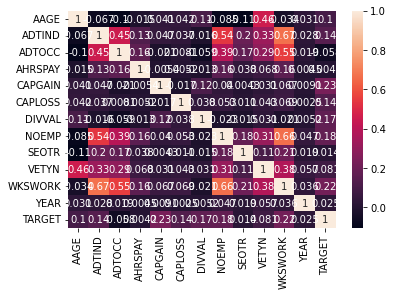

In [12]:
import seaborn as sns
sns.heatmap(d, annot = True)

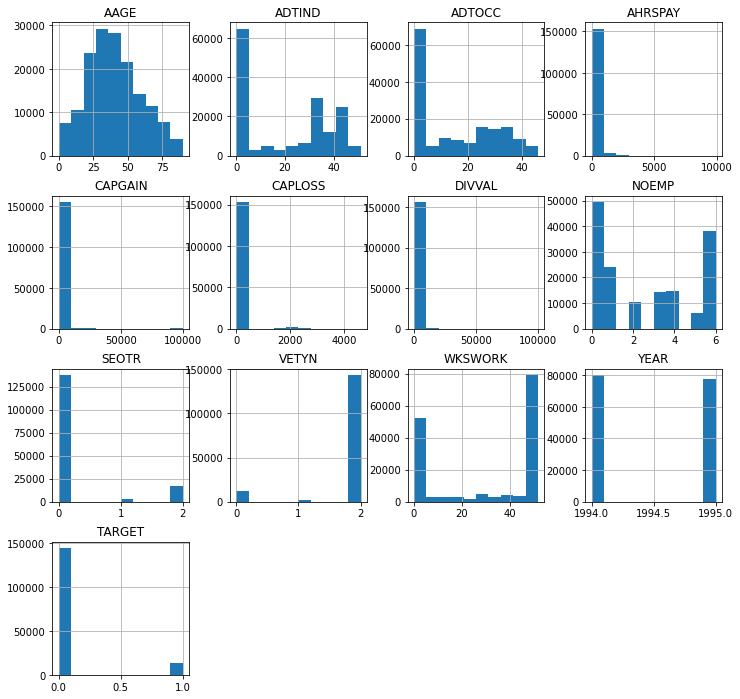

In [13]:
data.hist(figsize=(12,12), layout=(4,4), sharex=False);

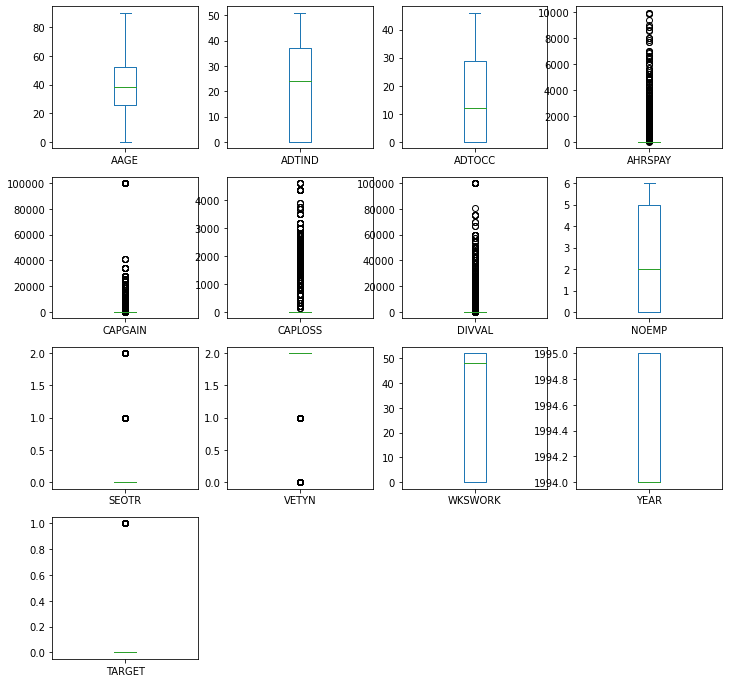

In [14]:
data.plot(kind = 'box', figsize=(12,12), layout=(4,4), sharex=False, subplots = True);

In [15]:
px.pie(data, values='AAGE', names='ACLSWKR', title='%AAGE', 
      color_discrete_sequence = px.colors.qualitative.T10)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



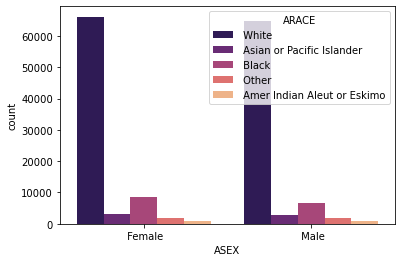

In [16]:
sns.countplot(data['ASEX'],hue='ARACE',data = data, palette = 'magma');